# Análise exploratória de dados

In [9]:
from IPython.display import display, Markdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
custom_colormap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

In [8]:
colors = ["#87cefa", "#ff0000"]
sns.set_palette(sns.color_palette(colors))

In [7]:
df = sns.load_dataset('diamonds')
df.to_csv("../data/raw/data.csv", index=False)
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
df.shape

TEMOS 10 COLUNAS E 53940 LINHAS

In [10]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

## 1. Descrição dos dados

Preço de cerca de 50.000 diamantes lapidados em formato redondo no conjunto de dados temos acesso a :
- Peso, Qualidade do corte , Largura , Comprimento, profundidade, Cor, Medida do quão limpo esta o diamante, Porcentagem total de profundidade e Largura do topo do diamante em relação ao ponto mais largo

## 1.1 Dicionario dos dados

In [31]:
data_path = Path("../data/external/dictionary.csv", index = False)
df_dict = pd.read_csv(data_path, sep=',')

df_dict

,Variavel,Descricao,Tipo,Subtipo:
0,carat,Peso do diamante,Quantitativo,Continua
1,cut,Qualidade do corte,Qualitativo,Ordinal
2,color,Cor do diamante,Qualitativo,Ordinal
3,clarity,Medida do quão limpo esta o diamante,Qualitativo,Ordinal
4,depth,Porcentagem total de profundidade,Quantitativo,Continua
5,table,Largura do topo do diamante em relação ao pont...,Quantitativo,Continua
6,price,Preco do diamante em dolares,Quantitativo,Continua
7,x,Comprimento em mm,Quantitativo,Continua
8,y,largura em mm,Quantitativo,Continua
9,z,profundidade em mm,Quantitativo,Continua


-----------------------------------------------------
- 10 variaveis sendo 3 qualitativas e 7 quantitativas
-----------------------------------------------------

## 2. Perguntas de partida e hipóteses

- Há dados faltantes ? se sim quantos e em quais variaveis ?
- Qual a distribuição dos dados ?
- Os dados quantitativos tem relação com o preço do diamante?
- Qual a distribuição dos dados qualitativos ordinais e dos quantitativos?
- A claridade e a cor tem relação com o preço ?
- Qual a relação entre as medidas dos diamantes (comprimento, largura e profundidade) e o preço.

## 2.1 Há dados faltantes ? Se sim quantos e em quais variaveis ?

In [32]:
missing_data = df.isna().sum()
print(missing_data)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


Portanto, não há dados faltantes nesse dataset

## 2.2 - Qual a distribuição dos dados ?

In [33]:
df.describe(include = 'all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


***A PARTIR DA DISTRIBUIÇÃO PODEMOS VER QUE:***

- Cortes classificados como ideal aparecem mais o que aparenta ser um ótimo indicativo.

- Temos 53.940 amostras de diamantes e como todas as variaveis tem o 'count' igual reforça que não há dados faltantes.

- Aqui podemos ver ,também, a mediana dos dados quantitativos onde tem 50%.

- O diamante mais leve pesa 0.2 kg.

## 2.3 Os dados quantitativos tem relação com o preço do diamante? 

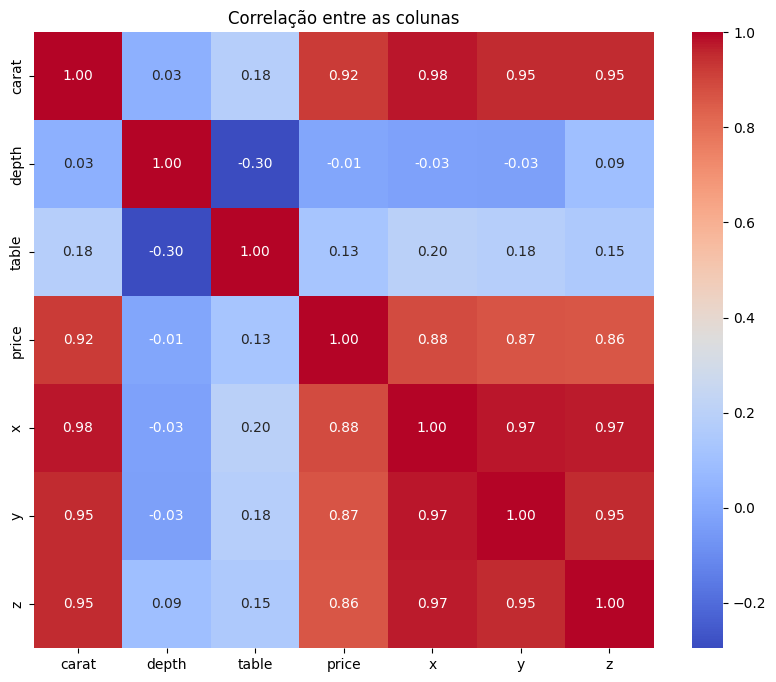



27749    18823
27748    18818
27747    18806
27746    18804
27745    18803
         ...  
4          335
3          334
2          327
1          326
0          326
Name: price, Length: 53940, dtype: int64


In [43]:
df_numeric = df.select_dtypes(include=[np.number])
correlacao = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre as colunas')
plt.show()
print("\n")
correlacao_price_caracteristicas = df['price'].sort_values(ascending=False)
print(correlacao_price_caracteristicas)

 - **Observando o gráfico, cheguei à conclusão de que, sim, os dados quantitativos têm relação com o preço, porém nem todos eles. Os que mais têm relação com o preço são o comprimento do diamante em mm e o peso dele mas largura e profundidade não ficam muito longe com altos indices de correlação com o preço. O que pode um estar relacionado com o outro já que quanto maior as medidas do diamante mais pesado ele será**

## 2.4 Qual a distribuição dos dados qualitativos ordinais e quantitativos ?

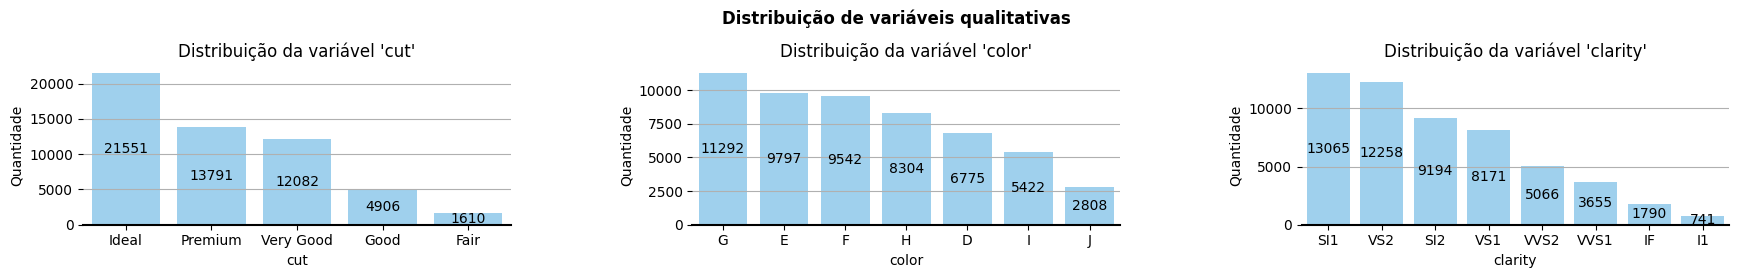

Porcentagem de cortes totais

Ideal: 39.95% Premium: 25.57% Very Good: 22.40% Good: 9.10% Fair: 2.98% 

Porcentagem de cores totais

G: 20.93% E: 18.16% F: 17.69% H: 15.39% D: 12.56% I: 10.05% J: 5.21% 

Porcentagem de claridades totais

SI1: 24.22% VS2: 22.73% SI2: 17.04% VS1: 15.15% VVS2: 9.39% VVS1: 6.78% IF: 3.32% I1: 1.37% 


In [72]:
fig, axes = plt.subplots(1, 3, figsize=(18,3))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, Variavel in enumerate(df_dict.query("Tipo == 'Qualitativo'").Variavel.to_list()):
    order = df[Variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=Variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='black',
        fontsize = 10
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{Variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()
output = 'Porcentagem de cortes totais\n\n'
porcentagem = df['cut'].value_counts(normalize = True)*100
for index, value in porcentagem.items():
    output += f"{index}: {value:.2f}% "
output += "\n\nPorcentagem de cores totais\n\n"
porcentagem = df['color'].value_counts(normalize = True)*100
for index, value in porcentagem.items():
    output += f"{index}: {value:.2f}% "
output += "\n\nPorcentagem de claridades totais\n\n"
porcentagem = df['clarity'].value_counts(normalize = True)*100
for index, value in porcentagem.items():
    output += f"{index}: {value:.2f}% "
print(output)

- TEMOS NO DATASET MAIS DIAMANTES NA MELHOR QUALIDADE DE CORTE POSSIVEL " IDEAL "
- EM CORES A ORDEM SERIA DE MELHOR PRA PIOR É " DEFGJHIJ " PORTANTO A QUARTA MELHOR COR LIDERA EM QUANTIDADE
- EM CLARIDADE A ORDEM SERIA DE MELHOR PRA PIOR " IF,VVS1,VVS2,VS1,VS2,SI1,SI2,LI " PORTANTO A TERCEIRA PIOR COR LIDERA EM QUANTIDADE

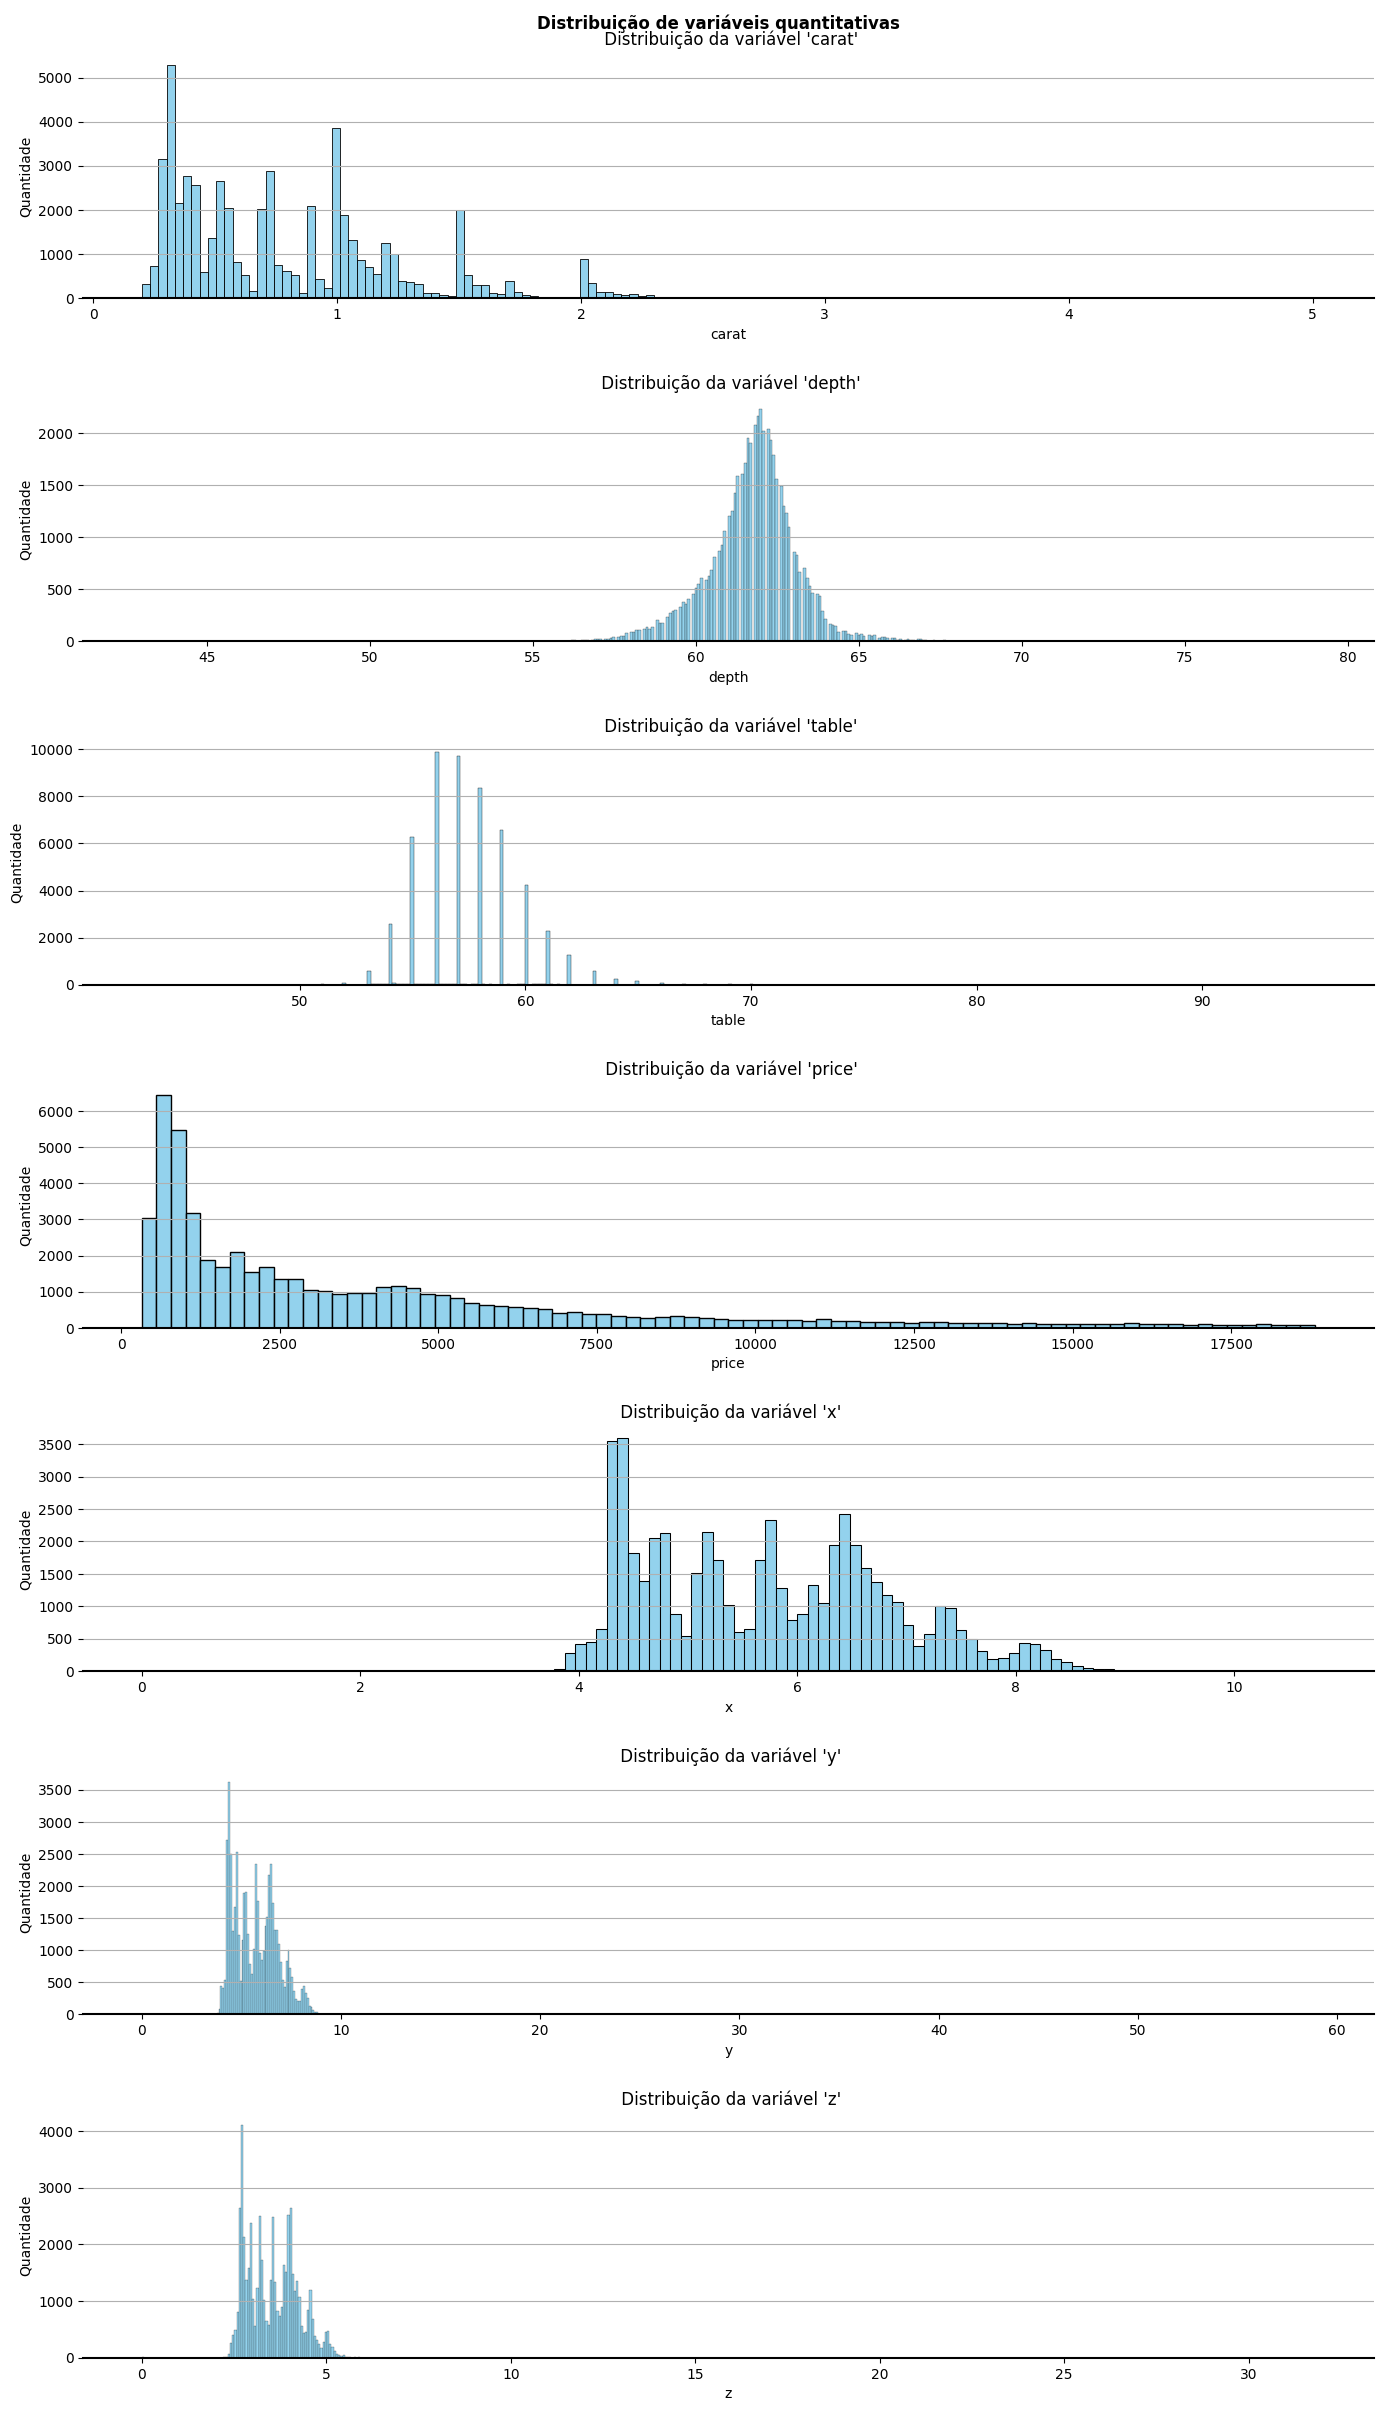

In [52]:
fig, axes = plt.subplots(7, 1, figsize=(15, 25))
plt.tight_layout(pad=6, w_pad=4, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, Variavel in enumerate(df_dict.query("Tipo == 'Quantitativo'").Variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=Variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )

    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"\n Distribuição da variável '{Variavel}'")
    plt.xlabel(Variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

- há uma grande diferença de quilates dos diamantes
- A distribuição da variável Porcentagem de profundidade total (depth) tende a uma curva normal
- A distribuição da variavel table está em maior quantidade entre 50% e 60%
- o preço do diamante é bem diverso porém tende a ser menor que os 5000 dolares
- o comprimento dos diamantes fica entre 4 e 8 mm
- a largura dos diamantes não passa de 10mm
- a profundidade dos diamantes quase não passa dos 6 mm

## 2.5 - A claridade a cor e o corte tem relação com o preço ?

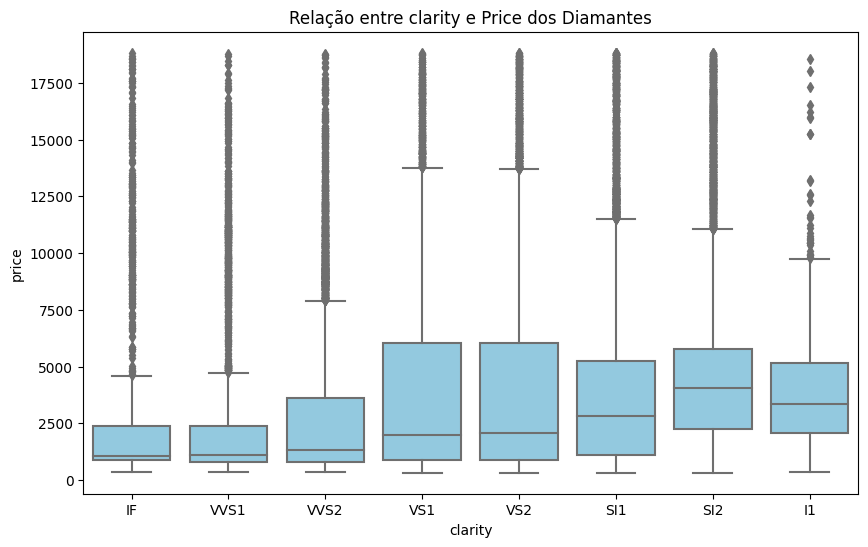

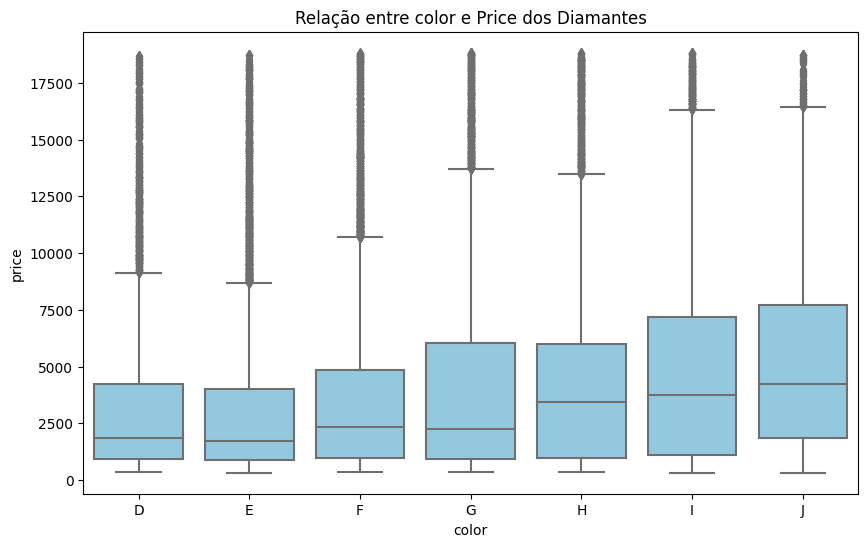

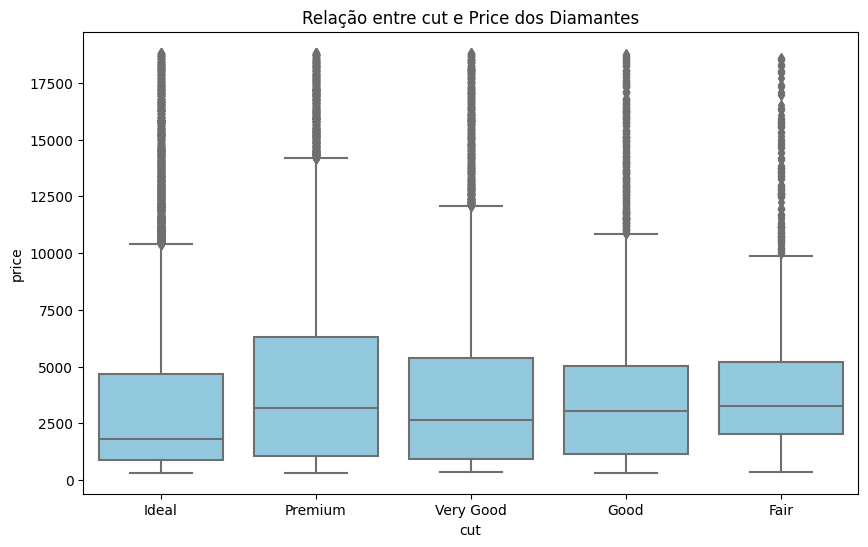

---
A partir dessa informação, sabemos que as variáveis 'clarity', 'color' e 'cut' não têm muita relação com o preço, pois, por exemplo, para 'clarity' ter relação com o preço, a caixa do 'IF' deveria ser maior em relação às demais. O preço da cor deveria ser maior em 'D', porém é maior em 'J', que é a pior cor para o diamante. E no 'cut', a mesma coisa: o 'ideal' deveria ter os maiores preços, porém não é o que realmente ocorre.

 ---

In [169]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='clarity', y='price', color='skyblue')
plt.title('Relação entre clarity e Price dos Diamantes')
plt.xlabel('clarity')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='color', y='price', color='skyblue')
plt.title('Relação entre color e Price dos Diamantes')
plt.xlabel('color')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price', color='skyblue')
plt.title('Relação entre cut e Price dos Diamantes')
plt.xlabel('cut')
plt.ylabel('price')
plt.show()

display(Markdown(
    "---\n"
    f"A partir dessa informação, sabemos que as variáveis 'clarity', 'color' e 'cut' não têm muita relação com o preço, pois, por exemplo, para 'clarity' ter relação com o preço, a caixa do 'IF' deveria ser maior em relação às demais. O preço da cor deveria ser maior em 'D', porém é maior em 'J', que é a pior cor para o diamante. E no 'cut', a mesma coisa: o 'ideal' deveria ter os maiores preços, porém não é o que realmente ocorre."
    "\n\n ---"
))

# 2.6 Medida dos diamantes (comprimento, largura e profundidade) por preço

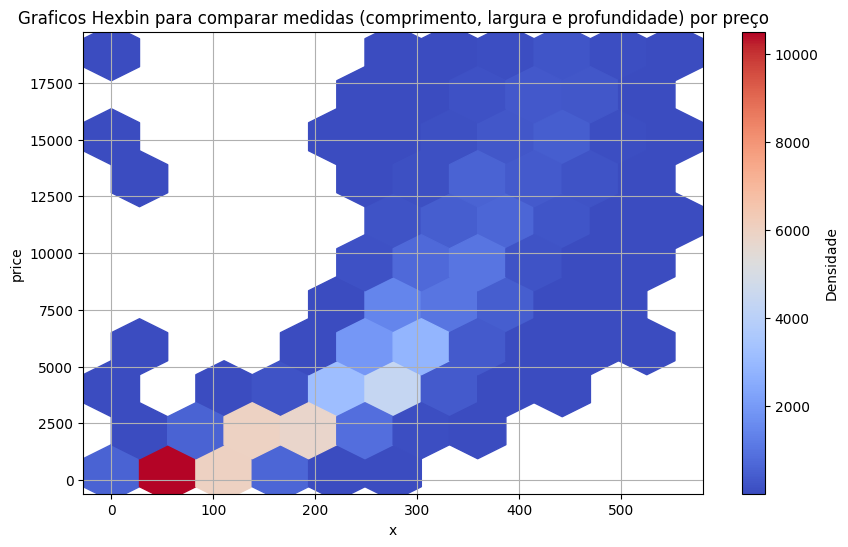

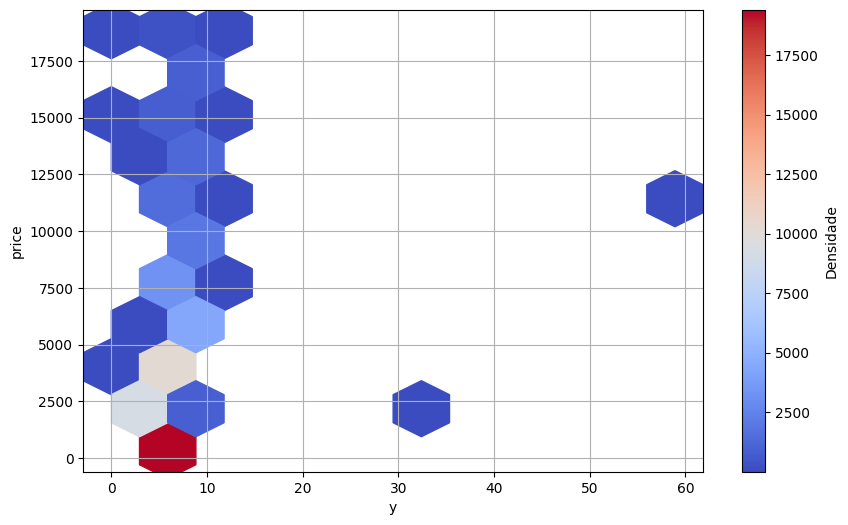

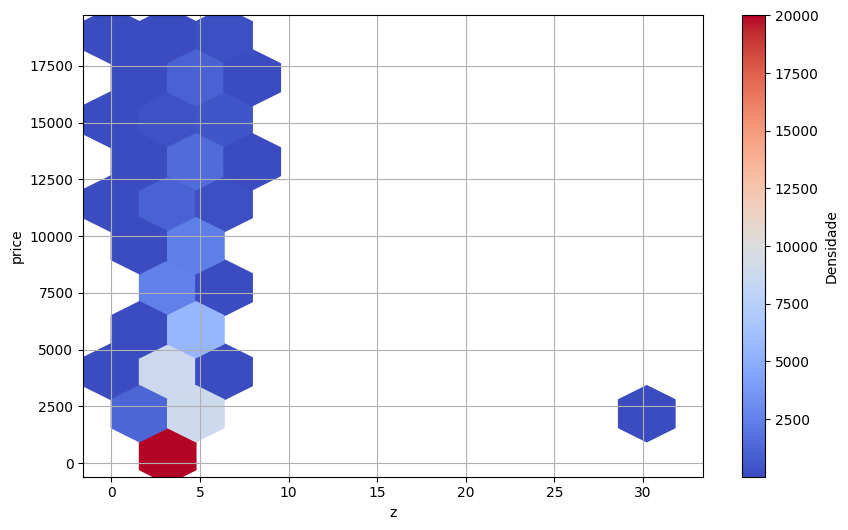

**Vendo os gráficos percebemos que realmente a medida que as medidas aumentam o preço tende a aumentar, pois valores menores tendem a sumir. Além disso, com esse gráfico podemos notar a quantidade de diamantes por losango que é um tipo de medida bem interessante**

In [167]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['x'], df['price'], gridsize=10, cmap='coolwarm', mincnt=1)

plt.colorbar(label='Densidade')
plt.title('Graficos Hexbin para comparar medidas (comprimento, largura e profundidade) por preço')
plt.xlabel('x')
plt.ylabel('price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hexbin(df['y'], df['price'], gridsize=10, cmap='coolwarm', mincnt=1)

plt.colorbar(label='Densidade')
plt.xlabel('y')
plt.ylabel('price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hexbin(df['z'], df['price'], gridsize=10, cmap='coolwarm', mincnt=1)

plt.colorbar(label='Densidade')
plt.xlabel('z')
plt.ylabel('price')
plt.grid(True)
plt.show()

display(Markdown("**Vendo os gráficos percebemos que realmente a medida que as medidas aumentam o preço tende a aumentar, pois valores menores tendem a sumir. Além disso, com esse gráfico podemos notar a quantidade de diamantes por losango que é um tipo de medida bem interessante**"))

## 3. Insights

*COM A AJUDA DOS GRÁFICOS CRIADOS CHEGUEI A ALGUMAS CONCLUSÕES :*
- A MAIORIA DOS DIAMANTES PESA ENTRE 1 A 2 KG.
- A MAIORIA DOS CORTES SÃO IDEAIS E A GRANDE MINORIA SÃO 'FAIR'.
- O COMPRIMENTO DO DIAMANTE E O PESO SÃO MUITO IMPORTANTES PARA ATRIBUIR VALOR.
- A LARGURA E A PROFUNDIDADE DOS DIAMANTES SOFREM POUCA VARIAÇÃO EM COMPARAÇÃO COM O COMPRIMENTO.
- O QUE MAIS ATRIBUI VALOR AO DIAMANTE É O CONJUNTO DE FATORES E NÃO APENAS UM ISOLADO.
- OS DADOS QUALITATIVOS NÃO ATRIBUEM PREÇO PARA O DIAMANTE.
- O PREÇO DOS DIAMANTES É BEM DIVERSO, PORÉM TENDE AOS 5000 DOLARES.
- O DIAMANTE MAIS LEVE TEM 0.2KG JÁ O MAIS PESADO TEM 5KG.
- A CORRELAÇÃO ENTRE PREÇO E PESO É A MAIOR DENTRE AS VARIAVEIS SENDO DE 0.92
- A GRANDE MAIORIA DOS DIAMANTES TEM MEDIDAS Z < 5, Y < 10 E X < 100